**Nombre**: Sofia Anaya Palafox

**Expediente**: 738594

A02 - Data Manipulation for Modeling

In [ ]:
import pandas as pd


In [4]:
import pandas as pd

file_b= '/content/sample_data/Boston Housing Dataset 1978.xlsx'
df_boston = pd.read_excel(file_b)

# Mostrar las primeras filas
display(df_boston.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# EDA


In [17]:
print("Descriptive Statistics for df_boston:")
display(df_boston.describe())

corr_matrix = df_boston.corr()

medv_corr = corr_matrix['MEDV'].sort_values(ascending=False)
print("\nCorrelations with Target Variable (MEDV):")
print(medv_corr)

Descriptive Statistics for df_boston:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000



Correlations with Target Variable (MEDV):
MEDV       1.000000
RM         0.740181
ZN         0.331570
B          0.264797
CHAS       0.154409
DIS        0.138798
RAD       -0.217902
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64


# Escalamiento min, MAX

In [13]:
df_minmax = df_boston.copy()

# 2. Identificar columas y exluir y
feature_cols = [col for col in df_minmax.columns if col != 'MEDV']

# 3. formula min max
for col in feature_cols:
    col_min = df_minmax[col].min()
    col_max = df_minmax[col].max()
    # Formula: (x - min) / (max - min)
    df_minmax[col] = (df_minmax[col] - col_min) / (col_max - col_min)

# 4. Display
print("First few rows of df_minmax (Scaled Features):")
display(df_minmax.head())

print("\nDescriptive statistics for scaled features (Verification):")
display(df_minmax[feature_cols].describe().loc[['min', 'max']])

print("\nVerification of MEDV (should be original):")
print(df_minmax['MEDV'].describe())

First few rows of df_minmax (Scaled Features):


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000634,0.18,0.083273,0.0,0.022084,0.031253,0.647998,0.129442,0.000000,0.399247,0.032209,1.000000,0.099449,24.0
1,0.002740,0.00,0.254867,0.0,0.012125,0.029656,0.786573,0.167793,0.001504,0.321077,0.038549,1.000000,0.226744,21.6
2,0.002738,0.00,0.254867,0.0,0.012125,0.037578,0.606526,0.167793,0.001504,0.321077,0.038549,0.989737,0.070379,34.7
3,0.003248,0.00,0.078587,0.0,0.010537,0.035639,0.451767,0.215676,0.003008,0.292125,0.040832,0.994276,0.037026,33.4
4,0.006928,0.00,0.078587,0.0,0.010537,0.037184,0.536733,0.215676,0.003008,0.292125,0.040832,1.000000,0.110159,36.2



Descriptive statistics for scaled features (Verification):


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



Verification of MEDV (should be original):
count    452.000000
mean      23.750442
std        8.808602
min        6.300000
25%       18.500000
50%       21.950000
75%       26.600000
max       50.000000
Name: MEDV, dtype: float64


# Escalamiento estándar

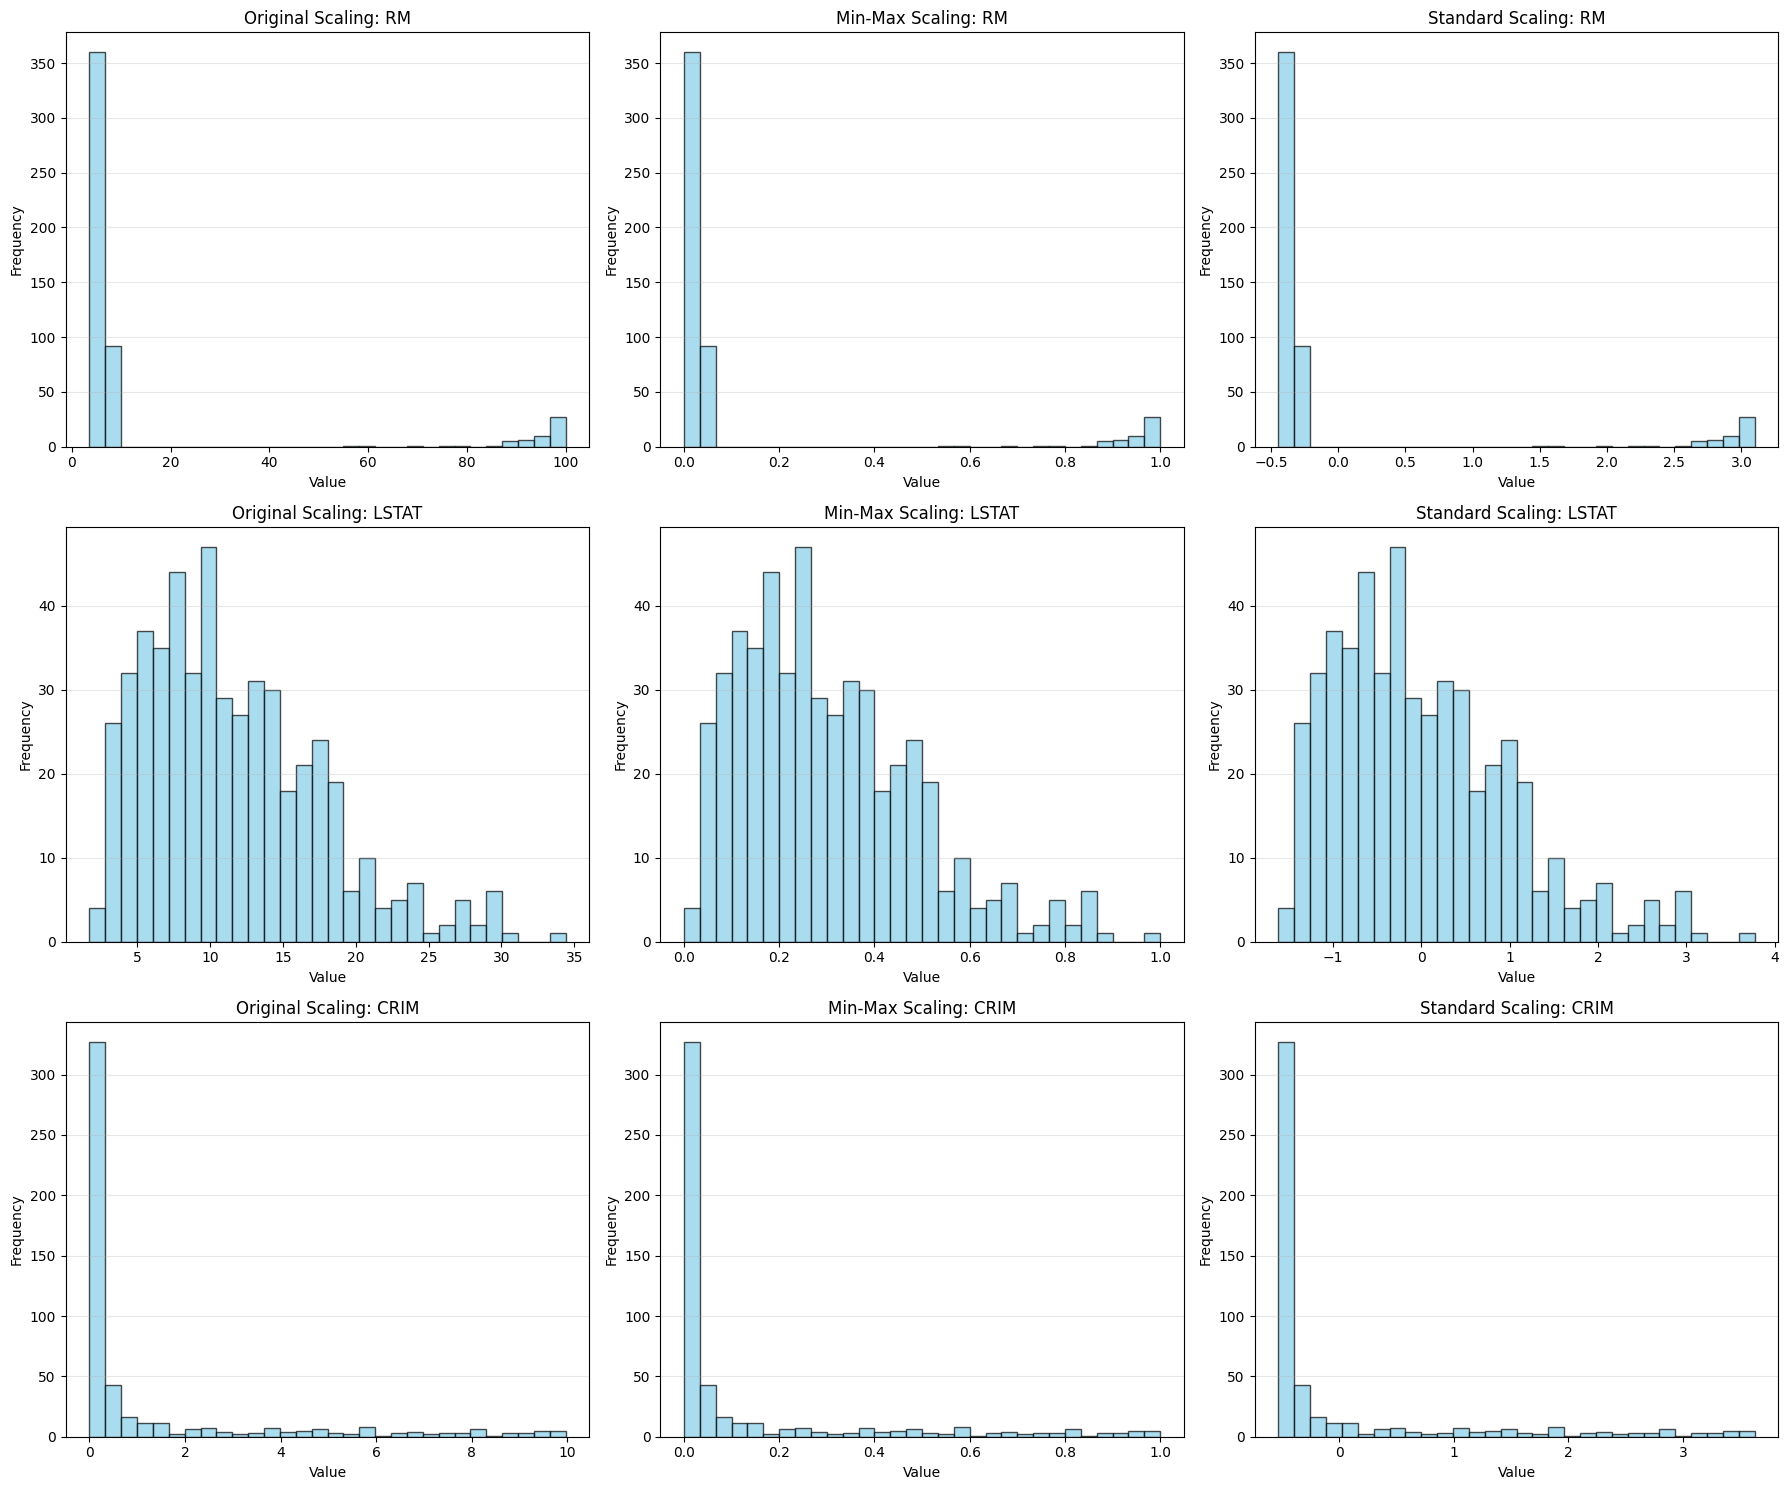

In [18]:
import matplotlib.pyplot as plt

selected_features = ['RM', 'LSTAT', 'CRIM']

fig, axes = plt.subplots(len(selected_features), 3, figsize=(18, 15))

datasets = [
    (df_boston, 'Original'),
    (df_minmax, 'Min-Max'),
    (df_standard, 'Standard')
]

for i, feature in enumerate(selected_features):
    for j, (df, scale_name) in enumerate(datasets):
        ax = axes[i, j]
        ax.hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

        ax.set_title(f'{scale_name} Scaling: {feature}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()